# Car Price Prediction Data Visualizing and Modeling

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Loading Dataset

In [2]:
cardf = pd.read_csv("CarPrice_Assignment.csv")
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploratory Data Analysis and Visualization

In [3]:
cardf.shape

(205, 26)

In our dataset , we have 205 records and 26 features in total 

In [4]:
cardf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Correlation Analysis



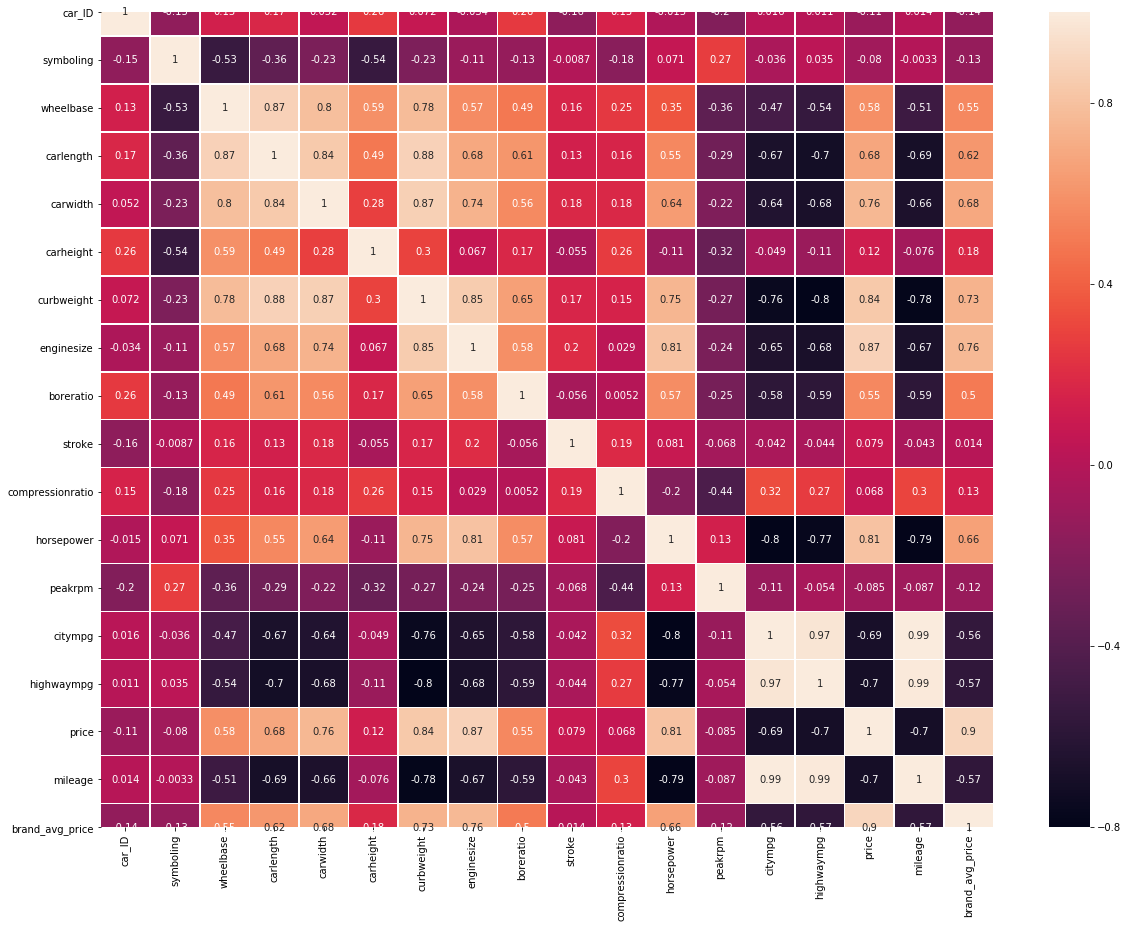

In [34]:
print("Correlation Analysis\n")
plt.figure(figsize=(20, 15))
sns.heatmap(cardf.corr(), annot=True, linewidths=0.5)
plt.show()

In [5]:
#checking the type of each attribute in the dataset to see if we have any missing values
print(cardf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

As you can see from above result, there are 205 entries for the dataset and each column has 205 values as well, this means that we don't have any missing values


### Checking Duplicates

In [6]:
if sum(cardf.duplicated(subset = 'car_ID')) == 0:
    print("No Duplicates data is clean")
else:
    print("Duplicates")

No Duplicates data is clean


## Univariate Analysis

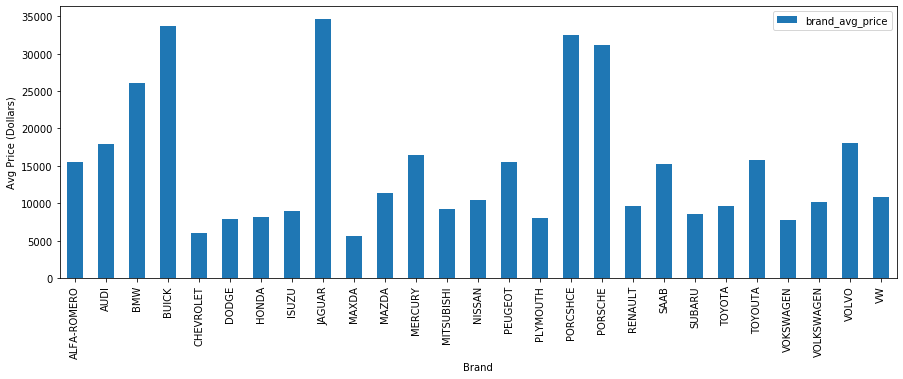

Above graph shows Avg Price of each company


In [7]:
cardf['brand'] = cardf.CarName.str.split(' ').str.get(0).str.upper()
cardf['mileage'] = cardf['citympg']*0.55 + cardf['highwaympg']*0.45
df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
cardf = cardf.merge(df_comp_avg_price, on = 'brand')
cardf['brand_category'] = cardf['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 else ("Mid_Range" if 10000 <= x < 20000 else "Luxury"))



df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = True, sort_columns = True, figsize = (15,5))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

print("Above graph shows Avg Price of each company")


### engine size VS price

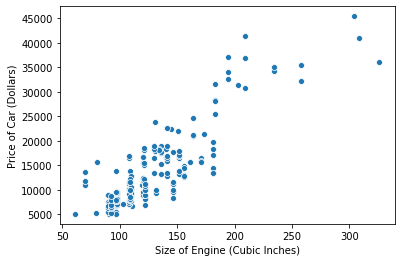

In [8]:
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = cardf)
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Bore ratio VS price

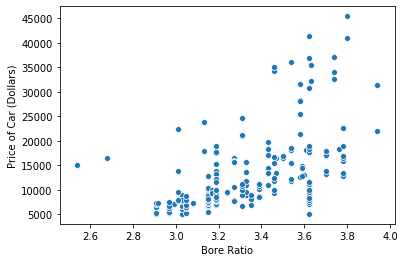

In [9]:
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = cardf)
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
plt.show()

### Stroke vs price

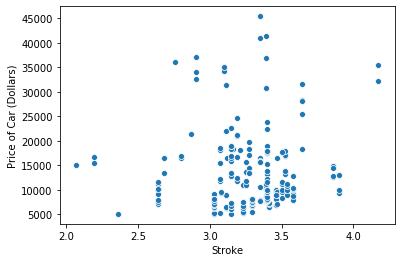

In [10]:
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = cardf)
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
plt.show()

### Compression Ratio

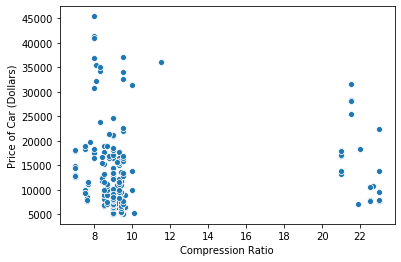

In [11]:
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = cardf)
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
plt.show()

### peakRpm vs price

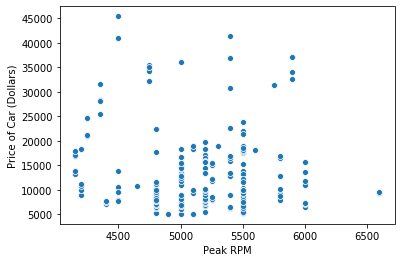

In [12]:
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = cardf)
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.show()

### Wheelbase VS price

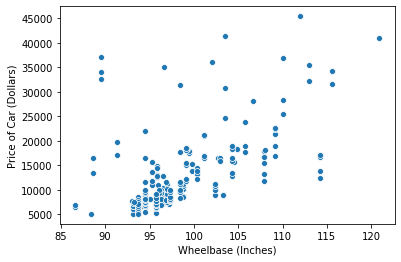

In [13]:
plt9 = sns.scatterplot(x = 'wheelbase', y = 'price', data = cardf)
plt9.set_xlabel('Wheelbase (Inches)')
plt9.set_ylabel('Price of Car (Dollars)')
plt.show()

### Mileage VS price

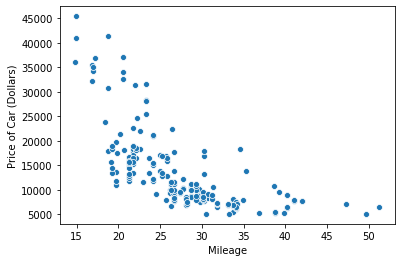

Size of Engine, bore ratio,wheelbase has positive correlation with price


In [14]:
plt6 = sns.scatterplot(x = 'mileage', y = 'price', data = cardf)
plt6.set_xlabel('Mileage')
plt6.set_ylabel('Price of Car (Dollars)')
plt.show()    
print("Size of Engine, bore ratio,wheelbase has positive correlation with price")

### Engine Type VS price

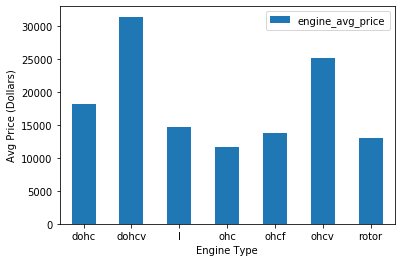

In [15]:
df_engine_avg_price = cardf[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = True)
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

### Num of Cylinder VS price

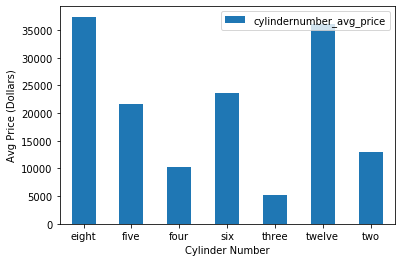

In [16]:
df_cylindernumber_avg_price = cardf[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = True)
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

### Fuel system VS price

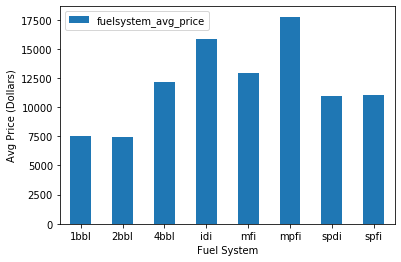

DOHCV and OHCV engine types are priced high, Eight and twelve cylinder cars have higher price, IDI and MPFI fuel system have higher price.


In [17]:
df_fuelsystem_avg_price = cardf[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = True)
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()  


print("DOHCV and OHCV engine types are priced high, Eight and twelve cylinder cars have higher price, IDI and MPFI fuel system have higher price.")  

### aspiration VS price

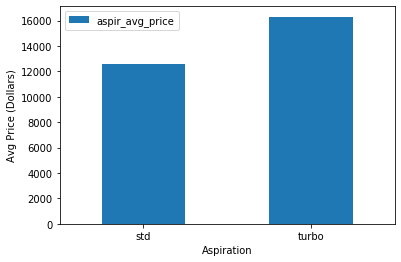

It can be seen that turbo aspiration have more Avg price than std


In [18]:
df_aspir_avg_price = cardf[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()
print("It can be seen that turbo aspiration have more Avg price than std")

### Fuel type VS price

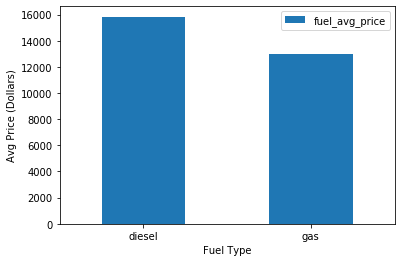

It can be seen that that diesel cars are more expensive than gas cars


In [19]:
df_fuel_avg_price = cardf[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

print("It can be seen that that diesel cars are more expensive than gas cars")

### Car Body VS price

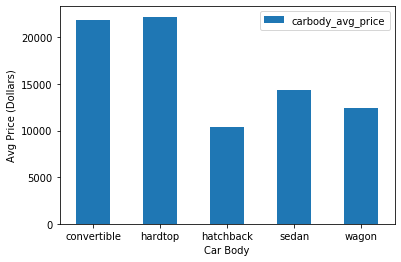

Hardtop and convertible are the most expensive so Price is depended on car body


In [20]:
df_body_avg_price = cardf[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 


print("Hardtop and convertible are the most expensive so Price is depended on car body")

### Drive wheel VS price

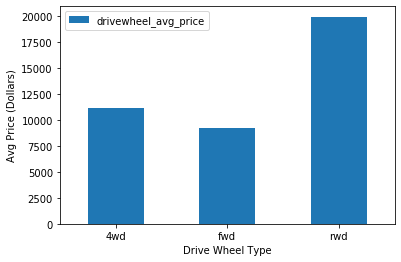

In [21]:
df_drivewheel_avg_price = cardf[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = True,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

### Horse power VS price

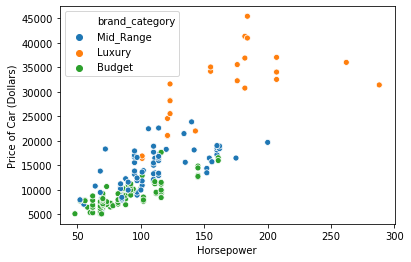

In [22]:
plt8 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = cardf)
plt8.set_xlabel('Horsepower')
plt8.set_ylabel('Price of Car (Dollars)')
plt.show()

### Car Dimensions VS price

#### length, height , width , Weight

Length width and weight of the car is positively related with the price.


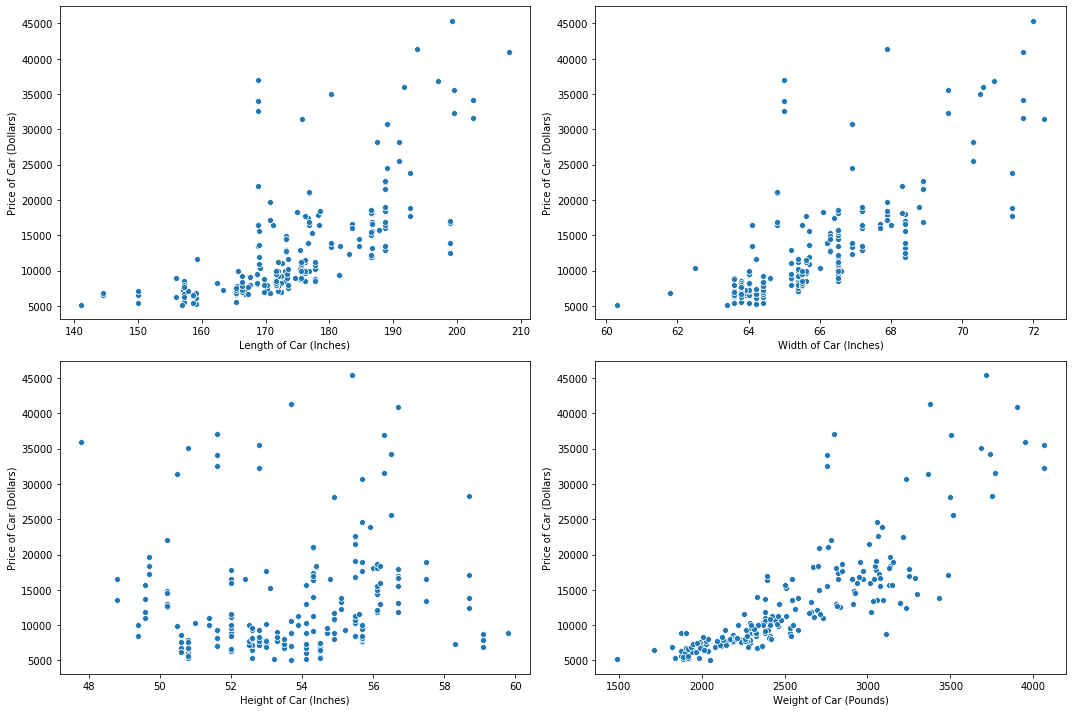

In [23]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = cardf, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')



plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = cardf, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')



plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = cardf, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')



plt4 = sns.scatterplot(x = 'curbweight', y = 'price', data = cardf, ax = axs[1,1])
plt4.set_xlabel('Weight of Car (Pounds)')
plt4.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

print("Length width and weight of the car is positively related with the price.")

## Data Attribute selection on basis of Dependency shown above

In [24]:
print("Dependent Variables finalized")

auto = cardf[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

Dependent Variables finalized


In [25]:
auto

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0,Mid_Range,25.25
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0,Mid_Range,21.70
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0,Mid_Range,20.25
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0,Mid_Range,26.45


## Changing Categorical in Numerical using Dummy variables

In [26]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)


drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,1
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,1
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,...,1,0,0,1,0,1,0,0,0,1
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,...,0,0,1,0,0,0,1,0,0,1
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,...,0,0,0,0,0,0,1,0,0,1


## Droping useless attributes

In [27]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)
auto.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,0,0,0,0,1,0,0,1


## Split Data into training and testing set

Splitting the dataset into two set in a ratio of 70% for training set and 30% for testing set.

In [28]:
x = auto.drop(['price'],axis=1)
y = auto['price']
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.25)

## Linear Regression

In [29]:
LRestimator = LinearRegression()
LRestimator.fit(X_train,Y_train)

In [30]:
tscore = LRestimator.score(X_test,Y_test)
print("Accuracy : ",tscore * 100)

Accuracy :  88.34518481536085


## Random Forest

In [36]:
regr = RandomForestRegressor(max_depth=7,random_state=10,n_estimators=100)
regr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [37]:
tscore = regr.score(X_test,Y_test)
print("Accuracy : ",tscore * 100)

Accuracy :  90.83485632305323


Since, Random Forest Accuracy is better than Linear Regression we can conclude that Random Forest perfoms better than Logistic Regression.  